In [ ]:
# https://robjhyndman.com/hyndsight/longseasonality/
# Fourier series as xreg in Arima, Sarima

In [1]:
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error

In [ ]:
n = 2000
m = 200
y = ts(rnorm(n) + (1:n)%%100/30, f=m)

library(forecast)
fit <- Arima(y, order=c(2,0,1), xreg=fourier(y, K=4))
plot(forecast(fit, h=2*m, xreg=fourier(y, K=4, h=2*m)))

library(forecast)
fit <- Arima(y, order=c(2,0,1))
plot(forecast(fit, h=2*m))

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0,30,size=50),
                  columns=["Random"],
                  index=pd.date_range("20180101", periods=50))
series = df['Random']

In [3]:
series.shape

(50,)

                             ARIMA Model Results                              
Dep. Variable:               D.Random   No. Observations:                   49
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -181.029
Method:                       css-mle   S.D. of innovations              9.211
Date:                Wed, 14 Nov 2018   AIC                            374.059
Time:                        16:14:07   BIC                            385.410
Sample:                    01-02-2018   HQIC                           378.365
                         - 02-19-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0965      0.084      1.149      0.257      -0.068       0.261
ar.L1.D.Random    -1.0371      0.144     -7.201      0.000      -1.319      -0.755
ar.L2.D.Random    -0.1296      0.145

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


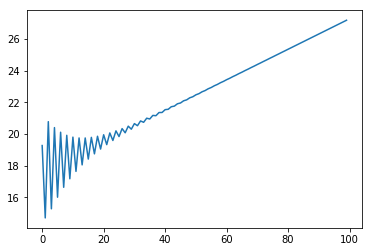

In [4]:
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit(transparams=True)
print(model_fit.summary())

yhat = model_fit.forecast(100)
plt.plot(yhat[0])
# Get forecast 442 steps ahead in future (10/15/2018 to 12/31/2019)
#yhat = model_fit.forecast(steps=442)
#series_arima = predictions.append(yhat)

In [5]:
yhat[0]

array([19.27112097, 14.69609416, 20.78109824, 15.27224698, 20.40584091,
       16.00472059, 20.11278973, 16.63167905, 19.91851438, 17.16987188,
       19.8034965 , 17.63737083, 19.75152346, 18.04864791, 19.7496875 ,
       18.41521419, 19.78772333, 18.74622396, 19.85746744, 19.04895721,
       19.95242772, 19.32920341, 20.0674413 , 19.59156665, 20.19840239,
       19.83970837, 20.34204581, 20.07654035, 20.49577494, 20.30437819,
       20.65752478, 20.52506339, 20.82565313, 20.74006042, 20.99885403,
       20.9505339 , 21.17608891, 21.15741   , 21.35653182, 21.36142526,
       21.53952594, 21.56316543, 21.72454893, 21.76309631, 21.91118539,
       21.96158835, 22.09910496, 22.15893615, 22.28804494, 22.35537397,
       22.47779641, 22.55108814, 22.66819321, 22.74622681, 22.85910321,
       22.94090782, 23.05042136, 23.13522487, 23.24206406, 23.32925248,
       23.43396489, 23.52304991, 23.62607098, 23.71666428, 23.81834031,
       23.91013309, 24.01073946, 24.10348612, 24.20324185, 24.29

In [14]:
exogx = np.array(range(1,151))
exogx.shape
#to make this easy, let's look at the ols of the trend (arima(0,0,0))
#fit2 = sm.tsa.ARIMA(df, (0,0,0),exog = exogx).fit()

(150,)

In [16]:
model = ARIMA(series, order=(2,1,2), exog=exogx[0:50])
model_fit = model.fit(transparams=True)
print(model_fit.summary())

#yhat = model_fit.forecast(100)
#plt.plot(yhat[0])

                             ARIMA Model Results                              
Dep. Variable:               D.Random   No. Observations:                   49
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -180.713
Method:                       css-mle   S.D. of innovations              9.147
Date:                Wed, 14 Nov 2018   AIC                            375.425
Time:                        16:43:20   BIC                            388.668
Sample:                    01-02-2018   HQIC                           380.450
                         - 02-19-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3647      0.342      1.065      0.293      -0.307       1.036
x1                -0.0103      0.013     -0.808      0.424      -0.035       0.015
ar.L1.D.Random    -1.0556      0.145

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


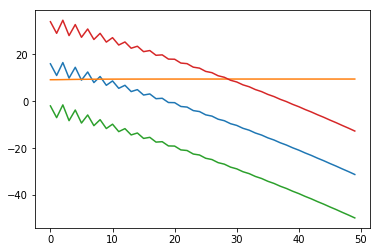

In [29]:
yhat = model_fit.forecast(50, exogx[-50:], 0.05)
plt.plot(yhat[0])
plt.plot(yhat[1])
plt.plot(yhat[2])


In [13]:
#df['lag']=df['diffM'].shift()
#df.dropna(inplace=True)
model3=sm.tsa.ARIMA(endog=series,exog=exogx,order=[2,1,2])
results3=model3.fit()
print(results3.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Random   No. Observations:                   49
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -180.713
Method:                       css-mle   S.D. of innovations              9.147
Date:                Wed, 14 Nov 2018   AIC                            375.425
Time:                        16:28:56   BIC                            388.668
Sample:                    01-02-2018   HQIC                           380.450
                         - 02-19-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3647      0.342      1.065      0.293      -0.307       1.036
x1                -0.0103      0.013     -0.808      0.424      -0.035       0.015
ar.L1.D.Random    -1.0556      0.145

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
X = scipy.fft(x)
Y = scipy.zeros(len(X))

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


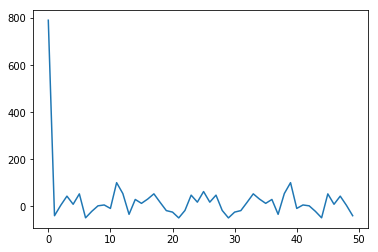

In [8]:
import scipy
X = scipy.fft(series)
plt.plot(X)

In [6]:
X

array([791.        +0.00000000e+00j, -39.5958785 -1.23074128e+01j,
         4.44006257+7.59566773e+01j,  43.49364742-5.55536588e+01j,
         8.99693052+1.92641061e+01j,  53.1246118 -2.00811416e+00j,
       -48.61810453+3.61017290e+01j, -21.06915387-1.42727974e+02j,
         2.33202291-1.40986484e+01j,   6.03232779+7.64798569e-01j,
        -8.67376208-9.12704949e+00j, 100.76845002-6.87248564e+01j,
        54.55505876-5.01059053e+01j, -33.75087895-5.17117266e+00j,
        29.4297308 +8.29179980e+01j,  12.8753882 +2.22703273e+01j,
        31.01524378-8.50598236e+00j,  53.30539232-6.83496874e+01j,
        17.16771281+7.14908493e+00j, -17.90823759+3.49299665e+01j,
       -24.32623792+2.32743844e+01j, -49.01802127+2.19489441e+01j,
       -17.31451716+1.47524903e+01j,  47.74235262+7.90858623e+01j,
        17.99585954-4.51970949e+01j,  63.        +1.06581410e-14j,
        17.99585954+4.51970949e+01j,  47.74235262-7.90858623e+01j,
       -17.31451716-1.47524903e+01j, -49.01802127-2.19489441e+

In [7]:
series

2018-01-01    26
2018-01-02    19
2018-01-03    20
2018-01-04    10
2018-01-05    20
2018-01-06     0
2018-01-07    21
2018-01-08     1
2018-01-09     5
2018-01-10    27
2018-01-11    23
2018-01-12     4
2018-01-13     3
2018-01-14    23
2018-01-15    14
2018-01-16    21
2018-01-17    12
2018-01-18    28
2018-01-19    24
2018-01-20    18
2018-01-21    15
2018-01-22    29
2018-01-23    26
2018-01-24    24
2018-01-25    25
2018-01-26    11
2018-01-27     4
2018-01-28     3
2018-01-29    19
2018-01-30     9
2018-01-31    23
2018-02-01    13
2018-02-02    26
2018-02-03    11
2018-02-04     5
2018-02-05     3
2018-02-06    21
2018-02-07    22
2018-02-08    29
2018-02-09    25
2018-02-10     5
2018-02-11    14
2018-02-12    20
2018-02-13     1
2018-02-14    14
2018-02-15    18
2018-02-16    26
2018-02-17    20
2018-02-18     1
2018-02-19    10
Freq: D, Name: Random, dtype: int64

In [ ]:
# https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
# Fourier extrapolation

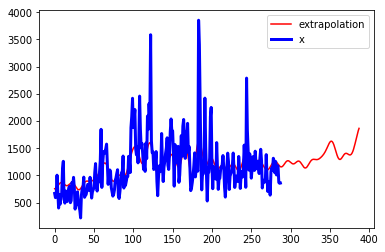

In [45]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    #indexes.sort(key = lambda i: np.absolute(f[i]))
    indexes = list(range(n))
    #indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))
    #indexes.reverse()
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 
                  776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 
                  775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 
                  884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 
                  775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816,
                  889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 
                  2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 
                  1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 
                  1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 
                  1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 
                  721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 
                  1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 
                  1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 
                  1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223,
                  782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181,
                  1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 
                  1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
    n_predict = 100
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

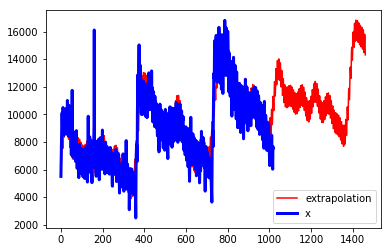

In [46]:
import numpy as np
import pandas as pd
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    #indexes.sort(key = lambda i: np.absolute(f[i]))
    indexes = list(range(n))
    indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))
    indexes.reverse()
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    data = pd.read_csv('rnb1015_2_AMR_NotPaid_v2.csv', header=None)
    #x = data.as_matrix(columns=None)
    #x = data.tolist()
    x = np.array(list(data[0]))
    #x = np.array([5500,5000,4500,4750,4000,3500,3000,6000,5500,5000,5250,4500,4000,3500])
    n_predict = 442
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 25                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    #indexes.sort(key = lambda i: np.absolute(f[i]))
    indexes = list(range(n))
    indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))
    indexes.reverse()
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    data = pd.read_csv('rnb1015_2_AMR_NotPaid_v2.csv', header=None)
    #x = data.as_matrix(columns=None)
    #x = data.tolist()
    x = np.array(list(data[0]))
    #x = np.array([5500,5000,4500,4750,4000,3500,3000,6000,5500,5000,5250,4500,4000,3500])
    n_predict = 442
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

<Figure size 640x480 with 1 Axes>

In [38]:
import pandas as pd
#data = pd.read_csv('NA_NB_1_20181126.csv')
#data = pd.read_csv('rnb1015_2_All.csv')
data = pd.read_csv('rnb1015_2_AMR_NotPaid_v2.csv', header=None)
#x = data.tolist()
data.shape

(1019, 1)

In [17]:
'''
    x = np.array([5500,
6513,
7602,
8871,
9828,
10103,
10064,
9559,
8881,
9820,
10494,
10273,
10131,
9925,
9306,
8485,
9289,
10242,
9815,
9828,
10052,
8914,
8647,
9214,
10192,
10415,
10421,
9579,
9202,
8564])
'''

'\n    x = np.array([5500,\n6513,\n7602,\n8871,\n9828,\n10103,\n10064,\n9559,\n8881,\n9820,\n10494,\n10273,\n10131,\n9925,\n9306,\n8485,\n9289,\n10242,\n9815,\n9828,\n10052,\n8914,\n8647,\n9214,\n10192,\n10415,\n10421,\n9579,\n9202,\n8564])\n'

In [13]:
x = data.as_matrix(columns=None)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [15]:
x

array([[6513],
       [7602],
       [8871],
       ...,
       [6026],
       [7672],
       [7552]])

In [39]:
data

,0
0,5500
1,6513
2,7602
3,8871
4,9828
5,10103
6,10064
7,9559
8,8881
9,9820


In [40]:
#pdToList = list(dataPd['2'])
pdToList = list(data[0])

In [33]:
data.head()

,0
0,5500
1,6513
2,7602
3,8871
4,9828


In [41]:
pdToList

[5500,
 6513,
 7602,
 8871,
 9828,
 10103,
 10064,
 9559,
 8881,
 9820,
 10494,
 10273,
 10131,
 9925,
 9306,
 8485,
 9289,
 10242,
 9815,
 9828,
 10052,
 8914,
 8647,
 9214,
 10192,
 10415,
 10421,
 9579,
 9202,
 8564,
 9942,
 11006,
 10734,
 10647,
 10139,
 9212,
 8400,
 8476,
 9544,
 10638,
 10006,
 9808,
 8813,
 8500,
 8433,
 10027,
 9620,
 9574,
 8241,
 8097,
 7062,
 8291,
 9036,
 8538,
 11738,
 8119,
 7346,
 6895,
 7768,
 8518,
 8212,
 8588,
 8665,
 7514,
 6960,
 8001,
 8333,
 8579,
 8718,
 8231,
 7232,
 6582,
 7326,
 7816,
 8820,
 7872,
 7086,
 6921,
 6078,
 7070,
 7431,
 7375,
 7394,
 7033,
 6301,
 5533,
 5414,
 7141,
 7275,
 7830,
 7086,
 6488,
 6228,
 6521,
 7151,
 7542,
 7355,
 6876,
 6540,
 5682,
 6752,
 7394,
 7486,
 6746,
 6766,
 6261,
 5479,
 6074,
 6964,
 7074,
 7091,
 6768,
 5893,
 5367,
 6152,
 6877,
 7227,
 7558,
 7115,
 6728,
 5365,
 7255,
 7317,
 7421,
 7667,
 6780,
 6206,
 5092,
 5532,
 7153,
 7554,
 9861,
 7282,
 6911,
 5810,
 6682,
 7440,
 7946,
 8369,
 7686,
 6

In [ ]:
# https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=1414291&userName=akuppam
# see for adding fourier as a regressor (in ARIMA in R)